# IPL First Innings Prediction

In [1]:
# importing essential libraries
import pandas as pd
import pickle

In [2]:
# loading the data set
dataset = pd.read_csv('ipl.csv')

In [3]:
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# --------Data cleaning ----------------------------
# Removing unwanted features from dataset
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
dataset.drop(labels=columns_to_remove, axis='columns', inplace=True)

In [5]:
dataset.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
dataset['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
dataset['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
# keeping only regular teams
regular_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [9]:
dataset = dataset[dataset['bat_team'].isin(regular_teams) & dataset['bowl_team'].isin(regular_teams)]

In [10]:
# removing the first 5 over's score (our prediction is based on the first 5 overs data)
dataset = dataset[dataset['overs'] > 5.0]

In [11]:
dataset.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [12]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
dataset['date'] = dataset['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [13]:
# spliting the dataset in training and test set
# this is time series data so we are spliting with date
x_train = dataset.drop(labels='total', axis=1)[dataset['date'].dt.year <= 2016]
x_test = dataset.drop(labels='total', axis=1)[dataset['date'].dt.year >= 2017]

In [14]:
y_train = dataset[dataset['date'].dt.year <= 2016]['total'].values
y_test = dataset[dataset['date'].dt.year >= 2017]['total'].values

In [15]:
# removing the date column in the splited dataset
x_train.drop(labels='date', axis=True, inplace=True)
x_test.drop(labels='date', axis=True, inplace=True)

In [16]:
x_train.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1


In [17]:
# --------------Data Preprocessing --------------------------------
# apply the One Hot encoding on the bat_team and bowl_team
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X_train = ct.fit_transform(x_train)
X_test = ct.transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
# predict the output
y_pred = regressor.predict(X_test)

In [20]:
X_test[0]

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  1. ,  0. , 46. ,  1. ,  5.1, 42. ,  1. ])

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.75311371187698

In [22]:
# Creating a pickle file for the regressor
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [23]:
# -----------------apply the ridge regression --------------------------

In [24]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [25]:
# finding the best optimal values for the ridge regression problem
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45688e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5095e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53788e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50815e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58055e-18): result may not be accurate.
  return linal

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [26]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.37285357197146


In [27]:
mean_squared_error(y_test, y_pred)

250.14633920492673

In [28]:
regressor.predict([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,  46. ,   1. ,
         5.1,  42. ,   1.]])

array([172.12109375])

In [29]:
y_pred = ridge_regressor.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

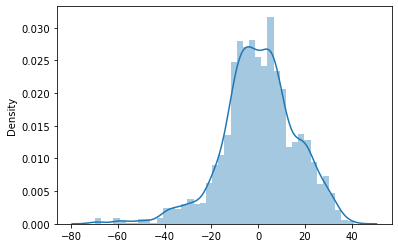

In [30]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [31]:
# ----------------------apply the lasso regressior algorithm----------------

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_reg = GridSearchCV(estimator=lasso, param_grid=parameters, cv=5, scoring='neg_mean_squared_error')
# train the model
lasso_reg.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4934025.41747384, tolerance: 2831.0842304714292
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5144530.6403141245, tolerance: 2975.1802671669775
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5087499.403259483, tolerance: 2945.6961236129746
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [33]:
# predict the results
lasso_prediction = lasso_reg.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

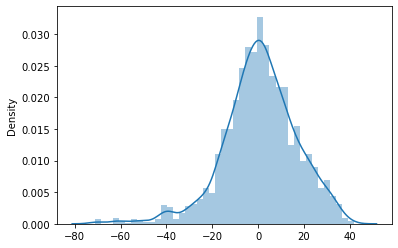

In [34]:
import seaborn as sns
sns.distplot(y_test-lasso_prediction)